In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE

# List of dataset filenames
datasets = [
    "c_baltimore.csv",
    "c_tucson.csv",
    "c_boston.csv",
    "c_cleveland.csv",
    "c_detroit.csv",
    "c_kansascity.csv",
    "c_louisville.csv",
    "c_memphis.csv",
    "c_sacramento.csv",
    "c_atlanta.csv"
]

# Features and target
features = ['time_of_day', 'day_of_week', 'season']
target = 'crime_type'

# Function to process each dataset
def process_dataset(filename):
    # Load the dataset
    data = pd.read_csv(filename)

    # Encode categorical features and target
    encoder = LabelEncoder()
    data_encoded = data.copy()
    for col in features + [target]:
        data_encoded[col] = encoder.fit_transform(data_encoded[col])

    # Separate predictors and target
    X = data_encoded[features]
    y = data_encoded[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE to balance the training dataset
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train a Random Forest Classifier with class weights
    rf_model = RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=20,
        min_samples_leaf=1,
        min_samples_split=2,
        bootstrap=True,
        class_weight='balanced'
    )
    rf_model.fit(X_train_resampled, y_train_resampled)

    # Predictions and evaluation on the test set
    y_pred = rf_model.predict(X_test)

    # Decode the numerical predictions and true labels back to their original categorical values
    y_test_decoded = encoder.inverse_transform(y_test)
    y_pred_decoded = encoder.inverse_transform(y_pred)

    # Accuracy and classification report
    accuracy = accuracy_score(y_test_decoded, y_pred_decoded)
    classification_rep = classification_report(y_test_decoded, y_pred_decoded)
    conf_matrix = pd.DataFrame(
        confusion_matrix(y_test_decoded, y_pred_decoded),
        index=encoder.classes_,
        columns=encoder.classes_
    )

    # Return results
    return accuracy, classification_rep, conf_matrix

# Process all datasets and print results
results = {}
for dataset in datasets:
    print(f"Processing {dataset}...")
    accuracy, classification_rep, conf_matrix = process_dataset(dataset)
    results[dataset] = (accuracy, classification_rep, conf_matrix)
    print(f"Results for {dataset}:")
    print(f"Accuracy: {accuracy}")
    print(f"Classification Report:\n{classification_rep}")
    print(f"Confusion Matrix:\n{conf_matrix}\n")



Processing c_baltimore.csv...
Results for c_baltimore.csv:
Accuracy: 0.3883639768471229
Classification Report:
              precision    recall  f1-score   support

     assault       0.64      0.40      0.50     14290
         gta       0.28      0.41      0.33      5533
     robbery       0.17      0.29      0.21      3673

    accuracy                           0.39     23496
   macro avg       0.36      0.37      0.35     23496
weighted avg       0.48      0.39      0.41     23496

Confusion Matrix:
         assault   gta  robbery
assault     5783  4653     3854
gta         1829  2278     1426
robbery     1386  1223     1064

Processing c_tucson.csv...
Results for c_tucson.csv:
Accuracy: 0.3597752221641401
Classification Report:
              precision    recall  f1-score   support

     assault       0.48      0.30      0.37      3363
         gta       0.46      0.39      0.42      2972
     robbery       0.19      0.44      0.27      1317

    accuracy                          

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd

# List of dataset filenames and corresponding city names
datasets = {
    "c_baltimore.csv": "Baltimore",
    "c_atlanta.csv": "Atlanta",
    "c_boston.csv": "Boston",
    "c_cleveland.csv": "Cleveland",
    "c_detroit.csv": "Detroit",
    "c_kansascity.csv": "KansasCity",
    "c_louisville.csv": "Louisville",
    "c_memphis.csv": "Memphis",
    "c_sacramento.csv": "Sacramento",
    "c_tucson.csv": "Tucson"
}

# Features and target
features = ['time_of_day', 'day_of_week', 'season']
target = 'crime_type'

# Initialize an empty list to store results
summary_data = []

# Function to process each dataset
for filename, city in datasets.items():
    print(f"Processing {filename} ({city})...")

    # Load the dataset
    data = pd.read_csv(filename)

    # Encode categorical features and target
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    data_encoded = data.copy()
    for col in features + [target]:
        data_encoded[col] = encoder.fit_transform(data_encoded[col])

    # Separate predictors and target
    X = data_encoded[features]
    y = data_encoded[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE to balance the training dataset
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train a Random Forest Classifier
    rf_model = RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=20,
        min_samples_leaf=1,
        min_samples_split=2,
        bootstrap=True,
        class_weight='balanced'
    )
    rf_model.fit(X_train_resampled, y_train_resampled)

    # Predictions
    y_pred = rf_model.predict(X_test)

    # Compute metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

    # Append results to summary_data
    summary_data.append({
        "Metric": "RandomForest",
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
        "city": city
    })

# Create a summary DataFrame
summary_table = pd.DataFrame(summary_data)

# Display the summary table
print(summary_table)

# Save summary table to a CSV file


Processing c_baltimore.csv (Baltimore)...
Processing c_atlanta.csv (Atlanta)...
Processing c_boston.csv (Boston)...
Processing c_cleveland.csv (Cleveland)...
Processing c_detroit.csv (Detroit)...
Processing c_kansascity.csv (KansasCity)...
Processing c_louisville.csv (Louisville)...
Processing c_memphis.csv (Memphis)...
Processing c_sacramento.csv (Sacramento)...
Processing c_tucson.csv (Tucson)...
         Metric  accuracy  precision    recall        f1        city
0  RandomForest  0.388364   0.482889  0.388364  0.413653   Baltimore
1  RandomForest  0.436570   0.439843  0.436570  0.437960     Atlanta
2  RandomForest  0.346241   0.563136  0.346241  0.392421      Boston
3  RandomForest  0.399112   0.653718  0.399112  0.471659   Cleveland
4  RandomForest  0.413719   0.621034  0.413719  0.452735     Detroit
5  RandomForest  0.436161   0.418921  0.436161  0.380673  KansasCity
6  RandomForest  0.332709   0.646988  0.332709  0.386501  Louisville
7  RandomForest  0.371043   0.707503  0.371043

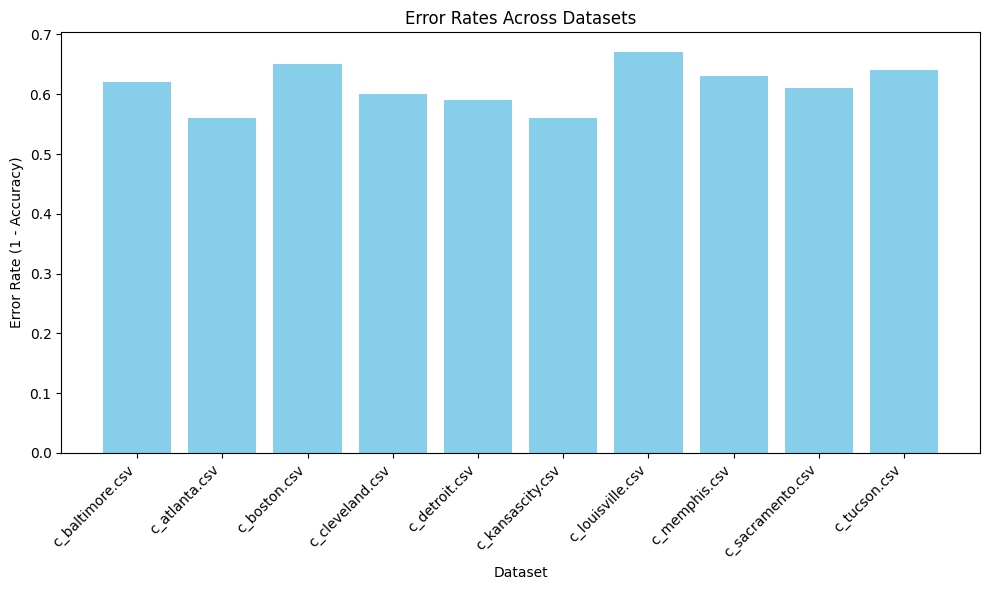

In [9]:
import matplotlib.pyplot as plt

# Example: Assume results dictionary with accuracy values for each dataset
results = {
    "c_baltimore.csv": 0.38,
    "c_atlanta.csv": 0.44,
    "c_boston.csv": 0.35,
    "c_cleveland.csv": 0.40,
    "c_detroit.csv": 0.41,
    "c_kansascity.csv": 0.44,
    "c_louisville.csv": 0.33,
    "c_memphis.csv": 0.37,
    "c_sacramento.csv": 0.39,
    "c_tucson.csv": 0.36,
}

# Convert accuracy to error rate
datasets = list(results.keys())
error_rates = [1 - acc for acc in results.values()]

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(datasets, error_rates, color='skyblue')
plt.xticks(rotation=45, ha="right")
plt.xlabel("Dataset")
plt.ylabel("Error Rate (1 - Accuracy)")
plt.title("Error Rates Across Datasets")
plt.tight_layout()
plt.show()


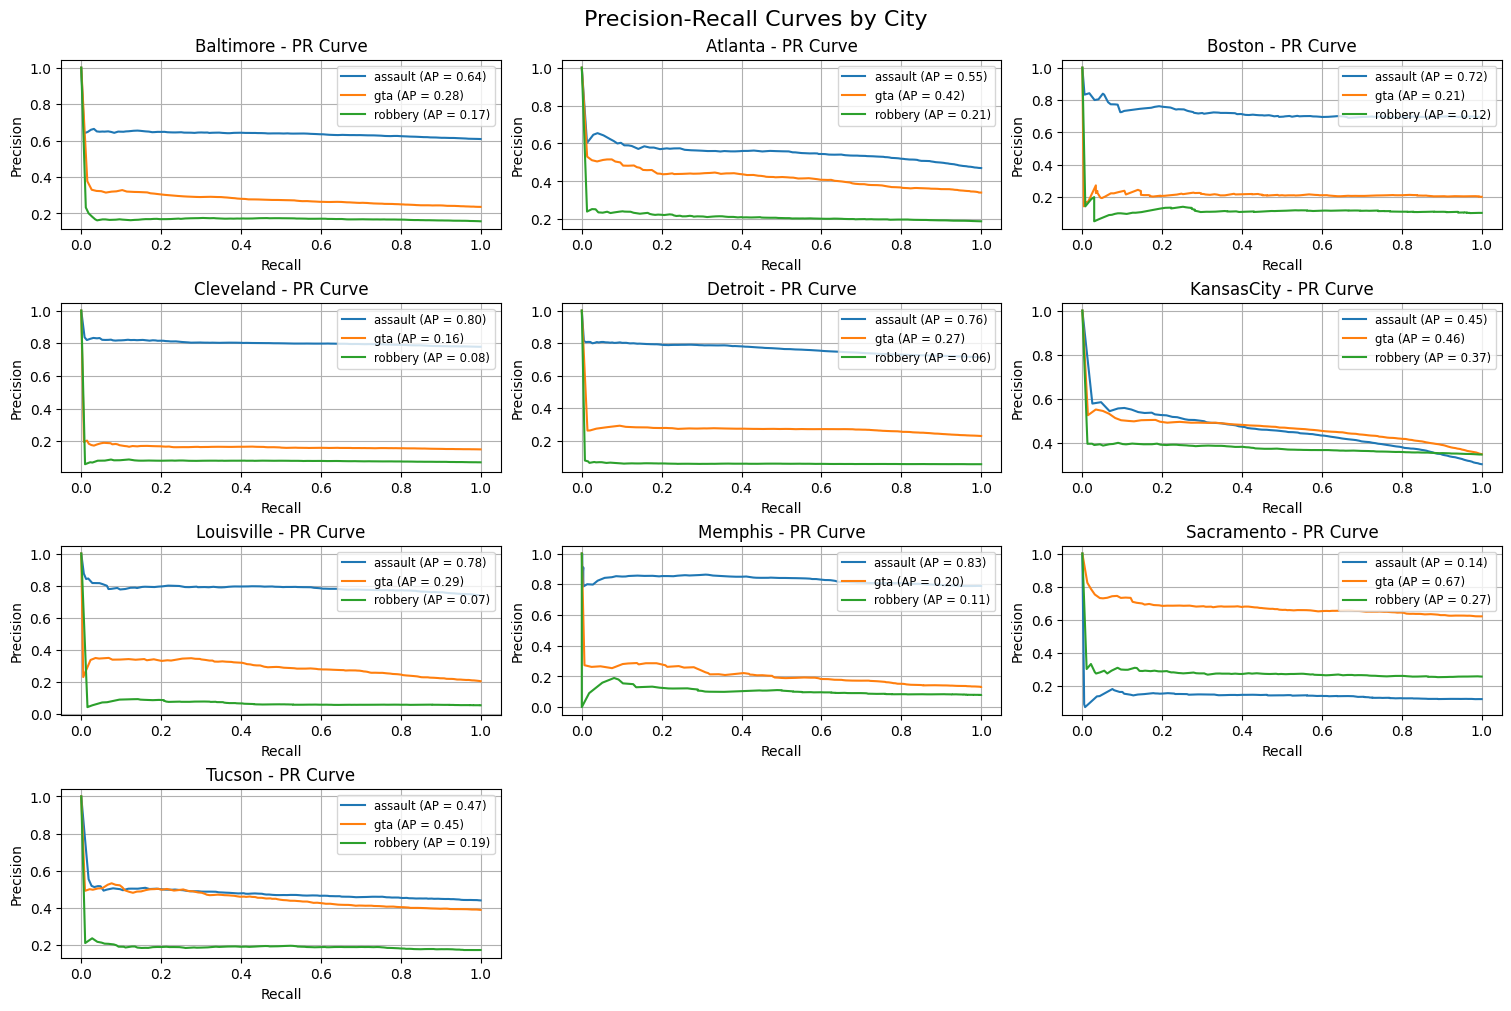

In [11]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

# List of dataset filenames and corresponding city names
datasets = {
    "c_baltimore.csv": "Baltimore",
    "c_atlanta.csv": "Atlanta",
    "c_boston.csv": "Boston",
    "c_cleveland.csv": "Cleveland",
    "c_detroit.csv": "Detroit",
    "c_kansascity.csv": "KansasCity",
    "c_louisville.csv": "Louisville",
    "c_memphis.csv": "Memphis",
    "c_sacramento.csv": "Sacramento",
    "c_tucson.csv": "Tucson"
}

# Features and target
features = ['time_of_day', 'day_of_week', 'season']
target = 'crime_type'

# Subplot dimensions
n_cols = 3
n_rows = -(-len(datasets) // n_cols)  # Ceiling division to determine rows

# Initialize a figure with subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), constrained_layout=True)
axes = axes.flatten()

# Iterate over datasets and plot Precision-Recall curves
for idx, (filename, city) in enumerate(datasets.items()):
    # Load the dataset
    data = pd.read_csv(filename)

    # Encode categorical features and target
    from sklearn.preprocessing import LabelEncoder
    encoder = LabelEncoder()
    data_encoded = data.copy()
    for col in features + [target]:
        data_encoded[col] = encoder.fit_transform(data_encoded[col])

    # Separate predictors and target
    X = data_encoded[features]
    y = data_encoded[target]

    # Binarize the output for multi-class PR curve
    classes = encoder.classes_
    y_binarized = label_binarize(y, classes=range(len(classes)))

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Apply SMOTE to balance the training dataset
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

    # Train a Random Forest Classifier
    rf_model = RandomForestClassifier(
        random_state=42,
        n_estimators=200,
        max_depth=20,
        min_samples_leaf=1,
        min_samples_split=2,
        bootstrap=True,
        class_weight='balanced'
    )
    rf_model.fit(X_train_resampled, y_train_resampled)

    # Get predicted probabilities
    y_score = rf_model.predict_proba(X_test)

    # Compute Precision-Recall curve and average precision for each class
    precision = dict()
    recall = dict()
    average_precision = dict()
    for i in range(len(classes)):
        precision[i], recall[i], _ = precision_recall_curve(label_binarize(y_test, classes=range(len(classes)))[:, i], y_score[:, i])
        average_precision[i] = average_precision_score(label_binarize(y_test, classes=range(len(classes)))[:, i], y_score[:, i])

    # Plot PR curve for this city in its subplot
    ax = axes[idx]
    for i, class_name in enumerate(classes):
        ax.plot(recall[i], precision[i], label=f"{class_name} (AP = {average_precision[i]:.2f})")
    ax.set_title(f"{city} - PR Curve")
    ax.set_xlabel("Recall")
    ax.set_ylabel("Precision")
    ax.legend(loc="upper right", fontsize="small")
    ax.grid()

# Remove any unused subplots
for idx in range(len(datasets), len(axes)):
    fig.delaxes(axes[idx])

# Finalize and show plot
plt.suptitle("Precision-Recall Curves by City", fontsize=16)
plt.show()
